<a href="https://colab.research.google.com/github/SSR-ds/Time-Series-with-Python/blob/main/Multivariate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
%matplotlib inline

import os
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from datetime import datetime
import seaborn as sns   

In [2]:
from google.colab import files
uploaded = files.upload()

Saving NYC_ED.csv to NYC_ED.csv


In [3]:
df1 = pd.read_csv('NYC_ED.csv')

In [4]:
df1.head()

,TimeStamp,Demand,Preciptation,Temperature
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [5]:
df1['TimeStamp'] = pd.to_datetime(df1.TimeStamp)
df1.dtypes

TimeStamp       datetime64[ns]
Demand                 float64
Preciptation           float64
Temperature            float64
dtype: object

In [6]:
df1= df1.set_index('TimeStamp')

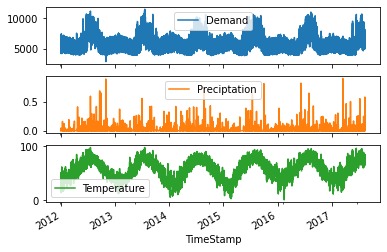

In [7]:
df1.plot(subplots=True);

In [8]:
ny_daily = df1.resample('D').mean()

In [9]:
ny_daily.head()

,Demand,Preciptation,Temperature
TimeStamp,,,
2012-01-01,4954.833333,0.002487,46.510000
2012-01-02,5302.954167,0.000000,40.496667
2012-01-03,6095.512500,0.000000,26.672500
2012-01-04,6336.266667,0.000000,20.585000
2012-01-05,6130.245833,0.000000,33.577500


In [10]:
from fbprophet import Prophet

In [11]:
df2 = ny_daily.reset_index()[['TimeStamp','Demand','Temperature']].rename({'TimeStamp':'ds','Demand':'y','Temperature':'Temp'}, axis='columns')

In [12]:
df2.head()

,ds,y,Temp
0,2012-01-01,4954.833333,46.510000
1,2012-01-02,5302.954167,40.496667
2,2012-01-03,6095.512500,26.672500
3,2012-01-04,6336.266667,20.585000
4,2012-01-05,6130.245833,33.577500


In [13]:
df2.isnull().sum()

ds      0
y       2
Temp    1
dtype: int64

In [14]:
df2.query('Temp != Temp')

,ds,y,Temp
1457,2015-12-28,5510.776333,NaN


In [15]:
#Prophet will take care of missing values in the y column but does not in the other dependant columns
df2['Temp']= df2['Temp'].fillna(method='ffill')

In [16]:
df2['Month'] = df2['ds'].dt.month

In [17]:
df2.head()

,ds,y,Temp,Month
0,2012-01-01,4954.833333,46.510000,1
1,2012-01-02,5302.954167,40.496667,1
2,2012-01-03,6095.512500,26.672500,1
3,2012-01-04,6336.266667,20.585000,1
4,2012-01-05,6130.245833,33.577500,1


In [18]:
df2[['y','Temp']].corr()

,y,Temp
y,1.000000,0.560888
Temp,0.560888,1.000000


In [19]:
df2.query('Temp > 80')[['y','Temp']].corr()

,y,Temp
y,1.000000,0.552918
Temp,0.552918,1.000000


In [20]:
df2.query('Temp < 80')[['y','Temp']].corr()

,y,Temp
y,1.000000,0.470562
Temp,0.470562,1.000000


In [21]:
def summer_temp(temp):
  if temp > 80:
    return 1 
  else:
    return 0

In [22]:
df2['summer_temp'] = df2['Temp'].apply(summer_temp)

In [23]:
df2['month_bins'] = pd.cut(df2['Month'],bins=3,labels=False)

In [24]:
df2.head()

,ds,y,Temp,Month,summer_temp,month_bins
0,2012-01-01,4954.833333,46.510000,1,0,0
1,2012-01-02,5302.954167,40.496667,1,0,0
2,2012-01-03,6095.512500,26.672500,1,0,0
3,2012-01-04,6336.266667,20.585000,1,0,0
4,2012-01-05,6130.245833,33.577500,1,0,0
5,2012-01-06,5867.537500,43.400833,1,0,0
6,2012-01-07,5177.441667,51.497917,1,0,0
7,2012-01-08,5120.541667,41.467083,1,0,0
8,2012-01-09,5890.820833,35.360000,1,0,0
9,2012-01-10,5871.262500,40.503333,1,0,0


In [25]:
#splitting the data

train =  df2[(df2['ds'] >= '2012-01-01') & (df2['ds'] <= '2017-04-30')]
test =  df2[(df2['ds'] > '2017-04-30')]

In [26]:
train.shape

(1947, 6)

In [27]:
test.shape

(104, 6)

In [28]:
model = Prophet(interval_width=0.95, yearly_seasonality=True)

In [29]:
#to show the multivariate
model.add_regressor('summer_temp')
model.add_regressor('month_bins')

In [30]:
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
model.params

{'beta': array([[-0.03588661, -0.05914478,  0.04925213,  0.040151  , -0.00950371,
         -0.0017641 , -0.007888  , -0.00253614,  0.00334735, -0.00586158,
          0.00140377,  0.00306312, -0.00530557, -0.00381353,  0.0033198 ,
         -0.00277058,  0.00071675,  0.001439  , -0.00134847, -0.00032656,
         -0.02719594,  0.02415074,  0.020274  ,  0.00152711, -0.00497268,
         -0.00518664,  0.13403389, -0.00485316]]),
 'delta': array([[ 2.85662540e-07, -3.28938461e-05, -1.84611163e-01,
         -3.40166731e-07,  2.36073075e-07,  1.22860116e-02,
          8.02613835e-03,  9.62416247e-03,  7.73159738e-07,
          4.91461912e-06, -3.06265086e-05, -4.69610498e-02,
         -8.01628651e-08,  4.01854566e-08,  1.44363922e-01,
          6.14490605e-06,  9.34855296e-08, -9.78634473e-02,
         -4.48324541e-02, -1.13822882e-07,  2.89904624e-08,
          4.12209966e-07,  3.75749866e-02,  2.84139135e-02,
          2.73446500e-06]]),
 'k': array([[0.14759561]]),
 'm': array([[0.58362343

In [32]:
future = model.make_future_dataframe(periods=104)

In [33]:
future.tail()

,ds
2046,2017-08-08
2047,2017-08-09
2048,2017-08-10
2049,2017-08-11
2050,2017-08-12


In [34]:
future['summer_temp']= df2['summer_temp']

In [35]:
future['month_bins'] = df2['month_bins']

In [37]:
future.head()

,ds,summer_temp,month_bins
0,2012-01-01,0,0
1,2012-01-02,0,0
2,2012-01-03,0,0
3,2012-01-04,0,0
4,2012-01-05,0,0


In [40]:
forecasting = model.predict(future)

new = forecasting[['ds','yhat','yhat_lower','yhat_upper']].tail()

In [41]:
new

,ds,yhat,yhat_lower,yhat_upper
2046,2017-08-08,7383.969466,6614.741568,8188.367742
2047,2017-08-09,7394.685698,6625.388745,8216.439746
2048,2017-08-10,7364.930189,6601.863985,8129.095463
2049,2017-08-11,7314.645110,6567.563497,8072.498077
2050,2017-08-12,6733.735172,5982.650981,7470.292730


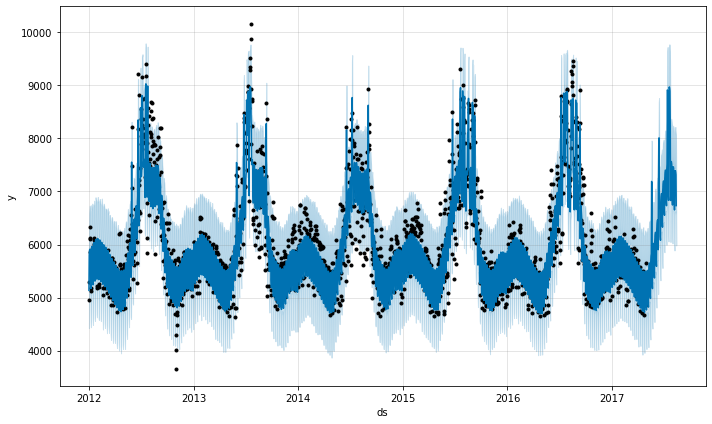

In [42]:
figure = model.plot(forecasting)

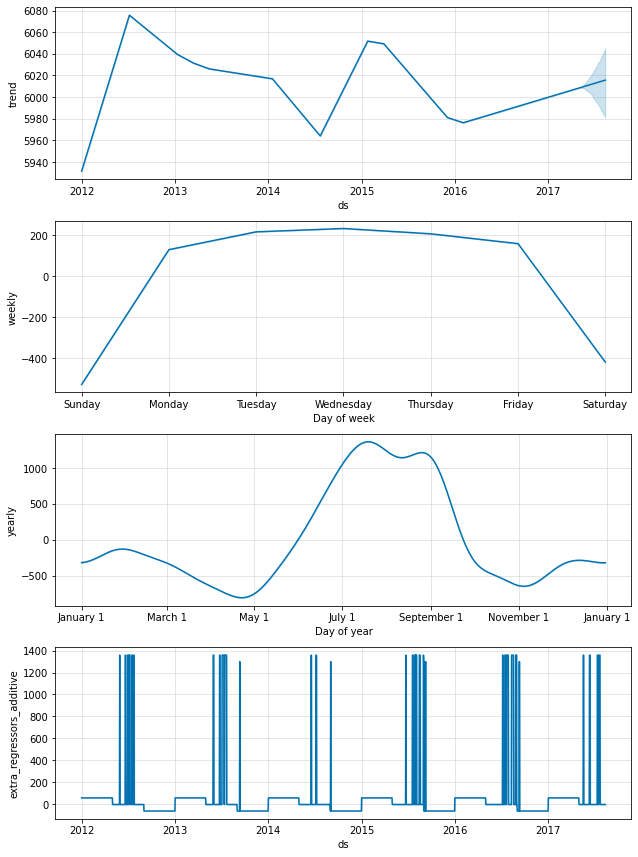

In [44]:
figure2 = model.plot_components(forecasting)

In [45]:
from fbprophet.diagnostics import cross_validation

cv1=cross_validation(model=model,initial ='731 days', horizon ='365 days')

INFO:fbprophet:Making 5 forecasts with cutoffs between 2014-05-01 00:00:00 and 2016-04-30 00:00:00


In [46]:
cv1.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-05-02,5489.989388,4796.283034,6223.639304,5460.325000,2014-05-01
1,2014-05-03,4909.352774,4222.045032,5673.914600,4893.683333,2014-05-01
2,2014-05-04,4793.826107,4067.974335,5534.031950,4764.137500,2014-05-01
3,2014-05-05,5491.734402,4768.539743,6196.874657,5406.762500,2014-05-01
4,2014-05-06,5570.097946,4860.542775,6273.424211,5409.750000,2014-05-01


In [48]:
from fbprophet.diagnostics import performance_metrics
pm = performance_metrics(cv1)
pm.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
653,363 days 00:00:00,140512.226385,374.849605,307.131875,0.056089,0.051283,0.978022
654,363 days 12:00:00,141015.660694,375.520520,306.927736,0.056055,0.051283,0.978022
655,364 days 00:00:00,143651.526269,379.013887,309.032261,0.056638,0.052164,0.972527
656,364 days 12:00:00,143265.586037,378.504407,308.342315,0.056527,0.051283,0.972527
657,365 days 00:00:00,137311.185988,370.555240,303.482847,0.056041,0.050722,0.978022
